Start of the Coding

Below code to convert xml network file into gml to create a network grpah

In [414]:
import xml.etree.ElementTree as ET
tree = ET.parse('Albiene.xml')
root = tree.getroot()
print(root.tag)

network


In [415]:
for child in root:
    print(child.tag)

meta
networkStructure
demands


In [416]:
network_structure = root.find('./networkStructure')

In [417]:
nodes = root.find("networkStructure/nodes")
nodes=[]
links=[]

In [418]:
nodes = root.find('networkStructure/nodes')

for node in nodes.findall('node'):
    node_id = node.get('id')
    coordinates = node.find('coordinates')

    if coordinates is not None:
        x = coordinates.find('x').text
        y = coordinates.find('y').text
        print(f"Node ID: {node_id}, Coordinates: ({x}, {y})")


Node ID: ATLAM5, Coordinates: (-84.3833, 33.75)
Node ID: ATLAng, Coordinates: (-85.5, 34.5)
Node ID: CHINng, Coordinates: (-87.6167, 41.8333)
Node ID: DNVRng, Coordinates: (-105.0, 40.75)
Node ID: HSTNng, Coordinates: (-95.517364, 29.770031)
Node ID: IPLSng, Coordinates: (-86.159535, 39.780622)
Node ID: KSCYng, Coordinates: (-96.596704, 38.961694)
Node ID: LOSAng, Coordinates: (-118.25, 34.05)
Node ID: NYCMng, Coordinates: (-73.9667, 40.7833)
Node ID: SNVAng, Coordinates: (-122.02553, 37.38575)
Node ID: STTLng, Coordinates: (-122.3, 47.6)
Node ID: WASHng, Coordinates: (-77.026842, 38.897303)


In [419]:
links = root.find('networkStructure/links')

In [420]:
capacities = []
costs = []
links = root.find('networkStructure/links')
if links is not None:
    for link in links.findall('link'):
        link_id = link.get('id')

        source_elem = link.find('source')
        source = source_elem.text if source_elem is not None else None
        
        target_elem = link.find('target')
        target = target_elem.text if target_elem is not None else None
        
        additional_module = link.find('additionalModules')
        if additional_module is not None:
            pre_installed_module = additional_module.find('addModule')
            if pre_installed_module is not None:
                capacity_elem = pre_installed_module.find('capacity')
                capacity = capacity_elem.text if capacity_elem is not None else None
                
                cost_elem = pre_installed_module.find('cost')
                cost = cost_elem.text if cost_elem is not None else None
                
                if capacity is not None and cost is not None:
                    capacities.append(float(capacity))
                    costs.append(float(cost))
                
                print(f"Link ID: {link_id}, Source: {source}, Target: {target}, Capacity: {capacity}, Cost: {cost}")

# Output the capacities and costs
print("Costs:", costs)

Link ID: ATLAM5_ATLAng, Source: ATLAng, Target: ATLAM5, Capacity: 40000.0, Cost: 133.0
Link ID: ATLAng_HSTNng, Source: HSTNng, Target: ATLAng, Capacity: 40000.0, Cost: 1081.0
Link ID: ATLAng_IPLSng, Source: IPLSng, Target: ATLAng, Capacity: 40000.0, Cost: 591.0
Link ID: ATLAng_WASHng, Source: WASHng, Target: ATLAng, Capacity: 40000.0, Cost: 901.0
Link ID: CHINng_IPLSng, Source: IPLSng, Target: CHINng, Capacity: 40000.0, Cost: 260.0
Link ID: CHINng_NYCMng, Source: NYCMng, Target: CHINng, Capacity: 40000.0, Cost: 1147.0
Link ID: DNVRng_KSCYng, Source: KSCYng, Target: DNVRng, Capacity: 40000.0, Cost: 745.0
Link ID: DNVRng_SNVAng, Source: SNVAng, Target: DNVRng, Capacity: 40000.0, Cost: 1516.0
Link ID: DNVRng_STTLng, Source: STTLng, Target: DNVRng, Capacity: 40000.0, Cost: 1573.0
Link ID: HSTNng_KSCYng, Source: KSCYng, Target: HSTNng, Capacity: 40000.0, Cost: 1028.0
Link ID: HSTNng_LOSAng, Source: LOSAng, Target: HSTNng, Capacity: 40000.0, Cost: 2196.0
Link ID: IPLSng_KSCYng, Source: KSCYn

In [421]:
gml_output = "graph [\n"
id_count = 0
eid_count = 0
nodes_list = []

# Extract nodes information
nodes = root.find('networkStructure/nodes')

for node in nodes.findall('node'):
    node_id = node.get('id')
    nodes_list.append(node_id)
    
    coordinates = node.find('coordinates')
    if coordinates is not None:
        x = coordinates.find('x').text
        y = coordinates.find('y').text
    else:
        x = '0'  # Default value if coordinates are missing
        y = '0'  # Default value if coordinates are missing
    
    # Append node information to GML output
    gml_output += '  node [\n'
    gml_output += f'    id {id_count}\n'
    gml_output += f'    label "{node_id}"\n'
    gml_output += f'    country "US"\n'
    gml_output += f'    Longitude {x}\n'
    gml_output += f'    Latitude {y}\n'
    gml_output += '  ]\n'
    
    id_count += 1

# Extract links information
links = root.find('networkStructure/links')
if links is not None:
    for link in links.findall('link'):
        link_id = link.get('id')
        
        source_elem = link.find('source')
        target_elem = link.find('target')
        
        if source_elem is not None and target_elem is not None:
            source_id = source_elem.text
            target_id = target_elem.text
            
            if source_id in nodes_list and target_id in nodes_list:
                source = nodes_list.index(source_id)
                target = nodes_list.index(target_id)
            else:
                continue  
            
            additional_module = link.find('additionalModules')
            if additional_module is not None:
                pre_installed_module = additional_module.find('addModule')
                if pre_installed_module is not None:
                    capacity_elem = pre_installed_module.find('capacity')
                    cost_elem = pre_installed_module.find('cost')
                    
                    if capacity_elem is not None:
                        capacity = capacity_elem.text
                    else:
                        capacity = '0' 
                    
                    if cost_elem is not None:
                        cost = cost_elem.text
                    else:
                        cost = '0'  
                    
                    gml_output += '  edge [\n'
                    gml_output += f'    id {eid_count}\n'
                    gml_output += f'    link_label "{link_id}"\n'
                    gml_output += f'    source {source}\n'
                    gml_output += f'    target {target}\n'
                    gml_output += f'    capacity {capacity}\n'
                    gml_output += f'    cost {cost}\n'
                    gml_output += '  ]\n'
                    
                    eid_count += 1
else:
    print("No links found in the XML structure.")

gml_output += "]"

output_file = 'Albiene.gml'
with open(output_file, 'w') as f:
    f.write(gml_output)

print(f"GML file '{output_file}' has been created successfully.")

GML file 'Albiene.gml' has been created successfully.


Thus the GML file named "Albiene" has been created

Creating Graph

In [422]:
import networkx as nx
G= nx.read_gml("Albiene.gml")
print(G.nodes(data=True))

[('ATLAM5', {'country': 'US', 'Longitude': -84.3833, 'Latitude': 33.75}), ('ATLAng', {'country': 'US', 'Longitude': -85.5, 'Latitude': 34.5}), ('CHINng', {'country': 'US', 'Longitude': -87.6167, 'Latitude': 41.8333}), ('DNVRng', {'country': 'US', 'Longitude': -105.0, 'Latitude': 40.75}), ('HSTNng', {'country': 'US', 'Longitude': -95.517364, 'Latitude': 29.770031}), ('IPLSng', {'country': 'US', 'Longitude': -86.159535, 'Latitude': 39.780622}), ('KSCYng', {'country': 'US', 'Longitude': -96.596704, 'Latitude': 38.961694}), ('LOSAng', {'country': 'US', 'Longitude': -118.25, 'Latitude': 34.05}), ('NYCMng', {'country': 'US', 'Longitude': -73.9667, 'Latitude': 40.7833}), ('SNVAng', {'country': 'US', 'Longitude': -122.02553, 'Latitude': 37.38575}), ('STTLng', {'country': 'US', 'Longitude': -122.3, 'Latitude': 47.6}), ('WASHng', {'country': 'US', 'Longitude': -77.026842, 'Latitude': 38.897303})]


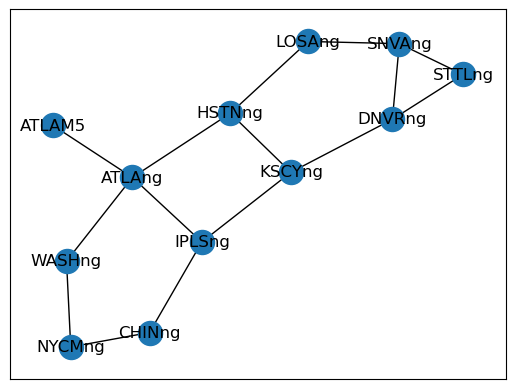

In [423]:
import matplotlib.pyplot as plt
pos = nx.spring_layout(G,seed=3113794652)
nx.draw_networkx(G,pos,with_labels=True)

In [489]:
import math 

In [490]:
def harvesine(origin, destination):
        print(origin)
        print(destination)
        lat1, lon1 = origin
        lat2, lon2 = destination
        radius = 6371000
        dlat = math.radians(lat2-lat1)
        dlon = math.radians(lon2-lon1)
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        d = radius * c

        return d

In [491]:
def add_latency_info(G):

    for i in G.edges:
            
            orig,dest = i
            #print(G.nodes[orig]['Latitude'])
            
            dist = harvesine([G.nodes[orig]['Latitude'],G.nodes[orig]['Longitude']],[G.nodes[dest]['Latitude'],G.nodes[dest]['Longitude']])
            latency = dist/(2*10**8)
            latency = latency * 1000   # scale factor just to show better in the graph
            latency = round(latency,2)
            G.edges[i]['weight'] = latency

In [492]:
add_latency_info(G)

[33.75, -84.3833]
[34.5, -85.5]
[34.5, -85.5]
[29.770031, -95.517364]
[34.5, -85.5]
[39.780622, -86.159535]
[34.5, -85.5]
[38.897303, -77.026842]
[41.8333, -87.6167]
[39.780622, -86.159535]
[41.8333, -87.6167]
[40.7833, -73.9667]
[40.75, -105.0]
[38.961694, -96.596704]
[40.75, -105.0]
[37.38575, -122.02553]
[40.75, -105.0]
[47.6, -122.3]
[29.770031, -95.517364]
[38.961694, -96.596704]
[29.770031, -95.517364]
[34.05, -118.25]
[39.780622, -86.159535]
[38.961694, -96.596704]
[34.05, -118.25]
[37.38575, -122.02553]
[40.7833, -73.9667]
[38.897303, -77.026842]
[37.38575, -122.02553]
[47.6, -122.3]


In [493]:
print(G.edges(data=True))

[('ATLAM5', 'ATLAng', {'id': 0, 'link_label': 'ATLAM5_ATLAng', 'capacity': 40000.0, 'cost': 133.0, 'weight': 0.66}), ('ATLAng', 'HSTNng', {'id': 1, 'link_label': 'ATLAng_HSTNng', 'capacity': 40000.0, 'cost': 1081.0, 'weight': 5.4}), ('ATLAng', 'IPLSng', {'id': 2, 'link_label': 'ATLAng_IPLSng', 'capacity': 40000.0, 'cost': 591.0, 'weight': 2.95}), ('ATLAng', 'WASHng', {'id': 3, 'link_label': 'ATLAng_WASHng', 'capacity': 40000.0, 'cost': 901.0, 'weight': 4.5}), ('CHINng', 'IPLSng', {'id': 4, 'link_label': 'CHINng_IPLSng', 'capacity': 40000.0, 'cost': 260.0, 'weight': 1.3}), ('CHINng', 'NYCMng', {'id': 5, 'link_label': 'CHINng_NYCMng', 'capacity': 40000.0, 'cost': 1147.0, 'weight': 5.72}), ('DNVRng', 'KSCYng', {'id': 6, 'link_label': 'DNVRng_KSCYng', 'capacity': 40000.0, 'cost': 745.0, 'weight': 3.72}), ('DNVRng', 'SNVAng', {'id': 7, 'link_label': 'DNVRng_SNVAng', 'capacity': 40000.0, 'cost': 1516.0, 'weight': 7.57}), ('DNVRng', 'STTLng', {'id': 8, 'link_label': 'DNVRng_STTLng', 'capacity

In [494]:
npmatrix=[]
for i in G.nodes:
    eachrow=[]
    for j in G.nodes:
        eachrow.append(nx.dijkstra_path_length(G,i,j))
    npmatrix.append(eachrow)
print(npmatrix)

[[0, 0.66, 4.91, 11.840000000000002, 6.0600000000000005, 3.6100000000000003, 8.120000000000001, 17.020000000000003, 6.83, 19.410000000000004, 19.69, 5.16], [0.66, 0, 4.25, 11.18, 5.4, 2.95, 7.46, 16.36, 6.17, 18.75, 19.03, 4.5], [4.91, 4.25, 0, 9.53, 9.65, 1.3, 5.81, 19.62, 5.72, 17.1, 17.38, 7.39], [11.84, 11.18, 9.530000000000001, 0, 8.85, 8.23, 3.72, 10.09, 15.25, 7.57, 7.85, 15.68], [6.0600000000000005, 5.4, 9.650000000000002, 8.85, 0, 8.350000000000001, 5.13, 10.96, 11.57, 13.48, 16.7, 9.9], [3.6100000000000003, 2.95, 1.3, 8.23, 8.350000000000001, 0, 4.51, 18.32, 7.02, 15.8, 16.08, 7.45], [8.12, 7.46, 5.81, 3.72, 5.13, 4.51, 0, 13.81, 11.53, 11.290000000000001, 11.57, 11.96], [17.02, 16.36, 19.62, 10.09, 10.96, 18.32, 13.81, 0, 22.53, 2.52, 8.2, 20.86], [6.83, 6.17, 5.72, 15.25, 11.57, 7.02, 11.53, 22.53, 0, 22.82, 23.1, 1.67], [19.41, 18.75, 17.1, 7.57, 13.48, 15.8, 11.290000000000001, 2.52, 22.82, 0, 5.68, 23.25], [19.689999999999998, 19.029999999999998, 17.38, 7.85, 16.7, 16.08

KRILL HERD ALGORITHM

In [599]:
import numpy as np
latency_matrix = np.array([[0, 0.66, 4.91, 11.84, 6.06, 3.61, 8.12, 17.02, 6.83, 19.41, 19.69, 5.16],
                           [0.66, 0, 4.25, 11.18, 5.4, 2.95, 7.46, 16.36, 6.17, 18.75, 19.03, 4.5],
                           [4.91, 4.25, 0, 9.53, 9.65, 1.3, 5.81, 19.62, 5.72, 17.1, 17.38, 7.39],
                           [11.84, 11.18, 9.53, 0, 8.85, 8.23, 3.72, 10.09, 15.25, 7.57, 7.85, 15.68],
                           [6.06, 5.4, 9.65, 8.85, 0, 8.35, 5.13, 10.96, 11.57, 13.48, 16.7, 9.9],
                           [3.61, 2.95, 1.3, 8.23, 8.35, 0, 4.51, 18.32, 7.02, 15.8, 16.08, 7.45],
                           [8.12, 7.46, 5.81, 3.72, 5.13, 4.51, 0, 13.81, 11.53, 11.29, 11.57, 11.96],
                           [17.02, 16.36, 19.62, 10.09, 10.96, 18.32, 13.81, 0, 22.53, 2.52, 8.2, 20.86],
                           [6.83, 6.17, 5.72, 15.25, 11.57, 7.02, 11.53, 22.53, 0, 22.82, 23.1, 1.67],
                           [19.41, 18.75, 17.1, 7.57, 13.48, 15.8, 11.29, 2.52, 22.82, 0, 5.68, 23.25],
                           [19.69, 19.03, 17.38, 7.85, 16.7, 16.08, 11.57, 8.2, 23.1, 5.68, 0, 23.53],
                           [5.16, 4.5, 7.39, 15.68, 9.9, 7.45, 11.96, 20.86, 1.67, 23.25, 23.53, 0]])

num_nodes = 12
bandwidth = np.array([random.uniform(5, 10) for _ in range(12)])
capacity = 7.8e6
cost=[133, 1081, 591, 901, 260, 1147, 745, 1516, 1573, 1028, 2196, 903, 505, 336, 1138]
print(bandwidth)

[6.47170482 5.90250289 5.87765641 8.03720927 9.09928786 7.55183946
 5.19956733 6.86699978 9.52313515 6.42648383 6.32366678 9.08920569]


In [582]:
import random

def fitness_function(controllers, latency_matrix, cost, bandwidth):
    delay = np.mean([np.mean(latency_matrix[:, controller]) for controller in controllers])
    total_cost = sum(cost[controller] for controller in controllers) 
    total_bandwidth = sum(bandwidth[controller] for controller in controllers)
    fitness = (1 / delay) + (1 / total_cost) + total_bandwidth
    return fitness

def initialize_population(pop_size, num_nodes, num_controllers):
    population = []
    for _ in range(pop_size):
        individual = random.sample(range(num_nodes), num_controllers)
        population.append(individual)
    return population

def select_best(population, latency_matrix, bandwidth, cost):
    best_individual = None
    best_fitness = float('-inf')
    for individual in population:
        fitness = fitness_function(individual, latency_matrix, cost, bandwidth)
        if fitness > best_fitness:
            best_fitness = fitness
            best_individual = individual
    return best_individual

def krill_herd_optimization(latency_matrix, bandwidth, cost, pop_size=10, iterations=100):
    num_nodes = len(latency_matrix)
    num_controllers = 2
    population = initialize_population(pop_size, num_nodes, num_controllers)
    for _ in range(iterations):
        best_individual = select_best(population, latency_matrix, bandwidth, cost)
        for i in range(pop_size):
            if random.random() < 0.1:  
                new_individual = random.sample(range(num_nodes), num_controllers)
                if fitness_function(new_individual, latency_matrix, cost, bandwidth) > fitness_function(population[i], latency_matrix, cost, bandwidth):
                    population[i] = new_individual
    return select_best(population, latency_matrix, bandwidth, cost)
best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost)
print(f"Best controllers: {best_controllers}")



Best controllers: [11, 9]


In [587]:
def cluster_switches(population, latency_matrix, bandwidth, cost):
    num_switches = len(latency_matrix)
    clusters = {'Controller A': [], 'Controller B': []}
    
    fitness_scores = [fitness_function(individual, latency_matrix, cost, bandwidth) for individual in population]
    
    best_index = np.argmax(fitness_scores)
    best_individual = population[best_index]
    
    for switch in range(num_switches):
        if switch not in best_individual:
            latency_to_a = latency_matrix[switch, best_individual[0]]
            latency_to_b = latency_matrix[switch, best_individual[1]]
            
            if latency_to_a < latency_to_b:
                clusters['Controller A'].append(switch)
            else:
                clusters['Controller B'].append(switch)
    
    return clusters
pop_size = 10
iterations = 100
population = [krill_herd_optimization(latency_matrix, bandwidth, cost, pop_size, iterations) for _ in range(pop_size)]
clusters = cluster_switches(population, latency_matrix, bandwidth, cost)

print("Cluster under Controller A:", clusters['Controller A'])
print("Cluster under Controller B:", clusters['Controller B'])

Cluster under Controller A: [0, 1, 2, 4, 5, 8]
Cluster under Controller B: [3, 6, 7, 10]


In [574]:
'''import random

def cluster_switches(population, latency_matrix, bandwidth, cost):
    num_switches = len(latency_matrix)
    clusters = {'Controller A': [], 'Controller B': []}

    fitness_scores = [fitness_function(individual, latency_matrix, cost, bandwidth) for individual in population]

    best_index = np.argmax(fitness_scores)
    best_individual = population[best_index]

    for switch in range(num_switches):
        if switch not in best_individual:
            fitness_to_a = fitness_function([switch, best_individual[0]], latency_matrix, cost, bandwidth)
            fitness_to_b = fitness_function([switch, best_individual[1]], latency_matrix, cost, bandwidth)

            if random.random() < 0.5:
                if fitness_to_a > fitness_to_b:
                    clusters['Controller A'].append(switch)
                else:
                    clusters['Controller B'].append(switch)
            else:
                if fitness_to_b > fitness_to_a:
                    clusters['Controller B'].append(switch)
                else:
                    clusters['Controller A'].append(switch)

    return clusters
pop_size = 10
iterations = 100
population = [krill_herd_optimization(latency_matrix, bandwidth, cost, pop_size, iterations) for _ in range(pop_size)]
clusters = cluster_switches(population, latency_matrix, bandwidth, cost)

print("Cluster under Controller A:", clusters['Controller A'])
print("Cluster under Controller B:", clusters['Controller B'])'''

'import random\n\ndef cluster_switches(population, latency_matrix, bandwidth, cost):\n    num_switches = len(latency_matrix)\n    clusters = {\'Controller A\': [], \'Controller B\': []}\n\n    fitness_scores = [fitness_function(individual, latency_matrix, cost, bandwidth) for individual in population]\n\n    best_index = np.argmax(fitness_scores)\n    best_individual = population[best_index]\n\n    for switch in range(num_switches):\n        if switch not in best_individual:\n            fitness_to_a = fitness_function([switch, best_individual[0]], latency_matrix, cost, bandwidth)\n            fitness_to_b = fitness_function([switch, best_individual[1]], latency_matrix, cost, bandwidth)\n\n            if random.random() < 0.5:\n                if fitness_to_a > fitness_to_b:\n                    clusters[\'Controller A\'].append(switch)\n                else:\n                    clusters[\'Controller B\'].append(switch)\n            else:\n                if fitness_to_b > fitness_to_

In [575]:
import numpy as np

def calculate_throughput(latency_matrix, controllers, bandwidth):
    num_nodes = len(latency_matrix)
    throughput = np.zeros(len(controllers))

    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        throughput[nearest_controller] += bandwidth[i]
    
    return throughput

throughput = calculate_throughput(latency_matrix, best_controllers, bandwidth)
for i, controller in enumerate(best_controllers):
    print(f"Throughput for Controller {controller}: {(throughput[i] / 10)}")


Throughput for Controller 3: 4.867925399933705
Throughput for Controller 8: 4.190078784613656


In [598]:
def calculate_packet_loss(latency_matrix, controllers, bandwidth, max_bandwidth_per_controller):
    num_controllers=2
    num_nodes = len(latency_matrix)
    packet_loss = np.zeros(len(controllers))
    total_bandwidth_processed = np.zeros(num_controllers)
    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        latency = latency_matrix[i, controllers[nearest_controller]]
        used_bandwidth = bandwidth[i]
        available_bandwidth = max_bandwidth_per_controller[controllers[nearest_controller]]
        
        if used_bandwidth > available_bandwidth:
            congestion_factor = used_bandwidth / available_bandwidth
        else:
            congestion_factor = 0
        
        packet_loss[nearest_controller] += latency * congestion_factor
        total_bandwidth_processed[nearest_controller] += used_bandwidth
    packet_loss_percentage = (packet_loss / total_bandwidth_processed) * 100
    
    return packet_loss, packet_loss_percentage
    return packet_loss
max_bandwidth_per_controller = np.random.randint(5, 10, size=num_nodes)
packet_loss, packet_loss_percentage = calculate_packet_loss(latency_matrix, best_controllers, bandwidth, max_bandwidth_per_controller)
for i, controller in enumerate(best_controllers):
    print(f"Packet loss for Controller {controller}: {packet_loss[i]}")
    print(f"Packet loss percentage for Controller {controller}: {packet_loss_percentage[i]:.2f}%")


Packet loss for Controller 11: 20.121023203355826
Packet loss percentage for Controller 11: 40.76%
Packet loss for Controller 9: 28.4069540617967
Packet loss percentage for Controller 9: 75.21%


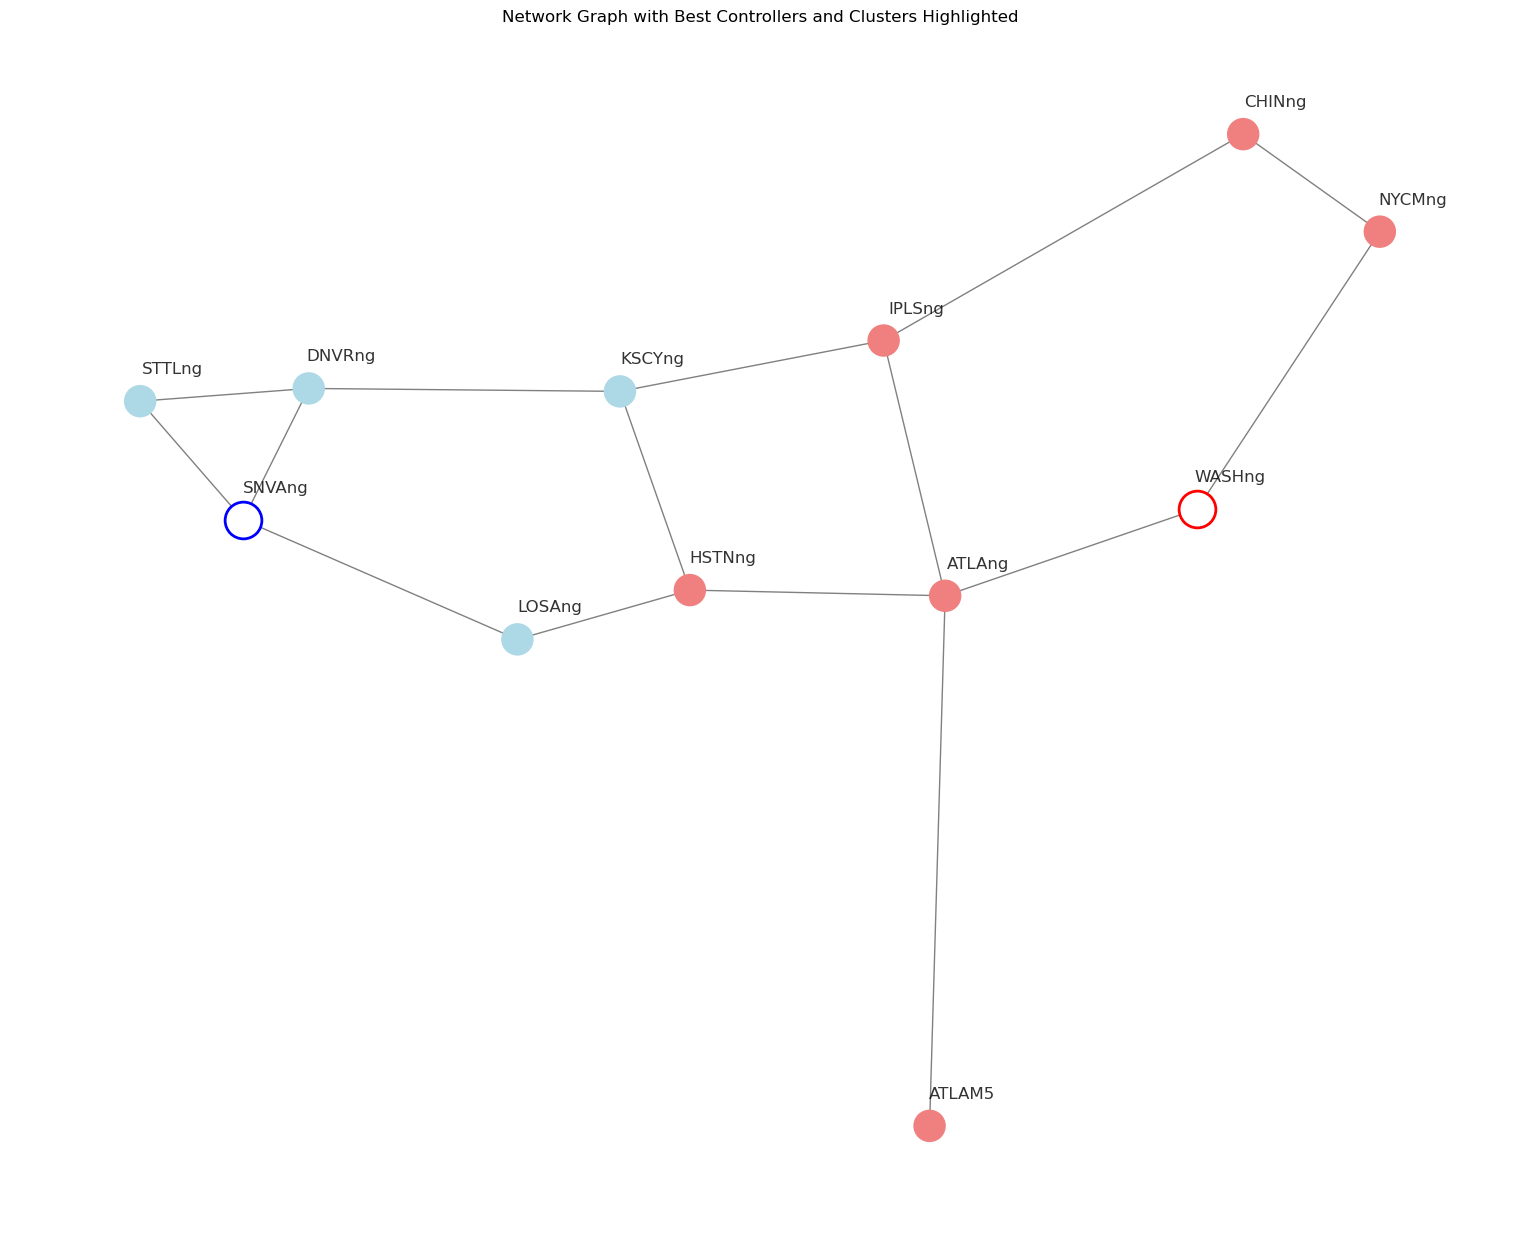

In [589]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, best_controllers, clusters, y_off=0.05, x_off=0.05):

    pos = nx.spring_layout(G) 
    
    node_names = list(G.nodes)
    controller_a_name = node_names[best_controllers[0]]
    controller_b_name = node_names[best_controllers[1]]
    
    node_colors = []
    for node in G.nodes():
        if node == controller_a_name:
            node_colors.append('red')  
        elif node == controller_b_name:
            node_colors.append('blue')  
        elif node_names.index(node) in clusters['Controller A']:
            node_colors.append('lightcoral')  
        elif node_names.index(node) in clusters['Controller B']:
            node_colors.append('lightblue')  
        else:
            node_colors.append('lightcoral')
    
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}
    
    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')
    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)
    
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_a_name], node_color='white', edgecolors='red', node_size=700, linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_b_name], node_color='white', edgecolors='blue', node_size=700, linewidths=2)
    
    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()

plot_network(G, best_controllers, clusters)

In [488]:
import numpy as np

def fitness_function(controllers, latency_matrix, cost, bandwidth):
    delay = np.mean([latency_matrix[:, controller].mean() for controller in controllers])
    total_cost = sum(cost[controller] for controller in controllers)
    total_bandwidth = sum(bandwidth[controller] for controller in controllers)
    fitness = (1 / delay) + (1 / total_cost) + total_bandwidth
    return fitness

def cluster_switches(population, latency_matrix, bandwidth, cost):
    num_switches = len(latency_matrix)
    num_controllers = len(population[0])  # Assuming all individuals have the same number of controllers
    
    clusters = {f'Controller {i}': [] for i in range(num_controllers)}
    
    for switch in range(num_switches):
        best_controller = None
        best_fitness = float('-inf')
        
        # Evaluate fitness for each controller configuration in population
        for controller_indices in population:
            fitness_score = fitness_function(controller_indices, latency_matrix, cost, bandwidth)
            
            # Check if this controller configuration is better for the switch
            if fitness_score > best_fitness:
                best_fitness = fitness_score
                best_controller = controller_indices
        
        # Assign switch to the best controller found
        clusters[f'Controller {population.index(best_controller)}'].append(switch)
    
    return clusters

# Example usage
latency_matrix = np.array([[0, 1, 2, 3, 4],
                           [1, 0, 1, 2, 3],
                           [2, 1, 0, 1, 2],
                           [3, 2, 1, 0, 1],
                           [4, 3, 2, 1, 0]])

bandwidth = [10, 20, 15, 25, 30]
cost = [100, 150, 120, 200, 180]

pop_size = 10
iterations = 100

# Assuming krill_herd_optimization and population generation functions are defined
population = [krill_herd_optimization(latency_matrix, bandwidth, cost, pop_size, iterations) for _ in range(pop_size)]

# Ensure population has different controller configurations
population = list(set(tuple(sorted(individual)) for individual in population))
population = [list(individual) for individual in population]

clusters = cluster_switches(population, latency_matrix, bandwidth, cost)

for controller, switches in clusters.items():
    print(f"Cluster under {controller}: {switches}")


Cluster under Controller 0: [0, 1, 2, 3, 4]
Cluster under Controller 1: []


In [433]:
'''def cluster_switches(best_controllers, latency_matrix, bandwidth, cost):
    num_switches = len(latency_matrix)
    clusters = {'Controller A': [], 'Controller B': []}
    
    best_individual = best_controllers
    
    # Evaluate fitness for each switch relative to both controllers
    for switch in range(num_switches):
        delay_to_a = np.mean(latency_matrix[switch, best_individual[0]])
        delay_to_b = np.mean(latency_matrix[switch, best_individual[1]])
        
        total_cost_a = cost[best_individual[0]]
        total_cost_b = cost[best_individual[1]]
        
        total_bandwidth_a = bandwidth[best_individual[0]]
        total_bandwidth_b = bandwidth[best_individual[1]]
        
        # Calculate fitness scores for assigning the switch to each controller
        if delay_to_a == 0 or total_cost_a == 0 or total_bandwidth_a == 0:
            fitness_a = float('-inf')  # Assign a very low fitness score
        else:
            fitness_a = (1 / delay_to_a) + (1 / total_cost_a) + total_bandwidth_a
        
        if delay_to_b == 0 or total_cost_b == 0 or total_bandwidth_b == 0:
            fitness_b = float('-inf')  # Assign a very low fitness score
        else:
            fitness_b = (1 / delay_to_b) + (1 / total_cost_b) + total_bandwidth_b
        
        # Determine which controller provides a better fit for the switch
        if fitness_a > fitness_b:
            clusters['Controller A'].append(switch)
        else:
            clusters['Controller B'].append(switch)
    
    return clusters


pop_size = 10
iterations = 100

# Perform krill herd optimization
best_controllers = krill_herd_optimization(latency_matrix, bandwidth, cost, pop_size, iterations)

# Cluster switches based on the best controllers found
clusters = cluster_switches(best_controllers, latency_matrix, bandwidth, cost)

print("Cluster under Controller A:", clusters['Controller A'])
print("Cluster under Controller B:", clusters['Controller B'])'''


'def cluster_switches(best_controllers, latency_matrix, bandwidth, cost):\n    num_switches = len(latency_matrix)\n    clusters = {\'Controller A\': [], \'Controller B\': []}\n    \n    best_individual = best_controllers\n    \n    # Evaluate fitness for each switch relative to both controllers\n    for switch in range(num_switches):\n        delay_to_a = np.mean(latency_matrix[switch, best_individual[0]])\n        delay_to_b = np.mean(latency_matrix[switch, best_individual[1]])\n        \n        total_cost_a = cost[best_individual[0]]\n        total_cost_b = cost[best_individual[1]]\n        \n        total_bandwidth_a = bandwidth[best_individual[0]]\n        total_bandwidth_b = bandwidth[best_individual[1]]\n        \n        # Calculate fitness scores for assigning the switch to each controller\n        if delay_to_a == 0 or total_cost_a == 0 or total_bandwidth_a == 0:\n            fitness_a = float(\'-inf\')  # Assign a very low fitness score\n        else:\n            fitness_a 

In [434]:
'''import numpy as np
import random

def fitness_function_per_switch(controller, switch, latency_matrix, cost, bandwidth):
    if controller >= latency_matrix.shape[1]:
        print(f"Invalid controller index {controller} for latency_matrix with shape {latency_matrix.shape}")
    delay = latency_matrix[switch, controller]
    controller_cost = cost[controller]
    controller_bandwidth = bandwidth[controller]
    fitness = (1 / delay) + (1 / controller_cost) + controller_bandwidth
    return fitness

def krill_herd_optimization_per_switch(latency_matrix, bandwidth, cost, num_controllers=2, pop_size=10, iterations=100):
    num_nodes = latency_matrix.shape[0]  # Number of nodes (switches)

    def calculate_fitness_for_switch(switch, controllers):
        return fitness_function_per_switch(controllers[switch], switch, latency_matrix, cost, bandwidth)
    
    def initialize_population(pop_size, num_nodes, num_controllers):
        population = []
        for _ in range(pop_size):
            individual = [random.randint(0, num_controllers - 1) for _ in range(num_nodes)]
            population.append(individual)
        return population
    
    def select_best(population):
        best_individual = None
        best_fitness = float('-inf')
        for individual in population:
            fitness = sum(calculate_fitness_for_switch(switch, individual) for switch in range(num_nodes))
            if fitness > best_fitness:
                best_fitness = fitness
                best_individual = individual
        return best_individual
    
    population = initialize_population(pop_size, num_nodes, num_controllers)
    
    for _ in range(iterations):
        best_individual = select_best(population)
        for i in range(pop_size):
            if random.random() < 0.1:
                population[i] = [random.randint(0, num_controllers - 1) for _ in range(num_nodes)]
                if sum(calculate_fitness_for_switch(switch, population[i]) for switch in range(num_nodes)) < sum(calculate_fitness_for_switch(switch, best_individual) for switch in range(num_nodes)):
                    best_individual = population[i]

    return best_individual




best_controllers = krill_herd_optimization_per_switch(latency_matrix, bandwidth, cost, num_controllers=2)
print(f"Best controllers: {best_controllers}")
'''

'import numpy as np\nimport random\n\ndef fitness_function_per_switch(controller, switch, latency_matrix, cost, bandwidth):\n    if controller >= latency_matrix.shape[1]:\n        print(f"Invalid controller index {controller} for latency_matrix with shape {latency_matrix.shape}")\n    delay = latency_matrix[switch, controller]\n    controller_cost = cost[controller]\n    controller_bandwidth = bandwidth[controller]\n    fitness = (1 / delay) + (1 / controller_cost) + controller_bandwidth\n    return fitness\n\ndef krill_herd_optimization_per_switch(latency_matrix, bandwidth, cost, num_controllers=2, pop_size=10, iterations=100):\n    num_nodes = latency_matrix.shape[0]  # Number of nodes (switches)\n\n    def calculate_fitness_for_switch(switch, controllers):\n        return fitness_function_per_switch(controllers[switch], switch, latency_matrix, cost, bandwidth)\n    \n    def initialize_population(pop_size, num_nodes, num_controllers):\n        population = []\n        for _ in range

In [435]:
'''import numpy as np
import random

def fitness_function_per_switch(controller, switch, latency_matrix, cost, bandwidth):
    delay = latency_matrix[switch, controller]
    controller_cost = cost[controller]
    controller_bandwidth = bandwidth[controller]
    fitness = (1 / delay) + (1 / controller_cost) + controller_bandwidth
    return fitness

def krill_herd_optimization_per_switch(latency_matrix, bandwidth, cost, pop_size=10, iterations=100):
    num_nodes = latency_matrix.shape[0]  # Number of nodes (switches)
    num_controllers = len(cost)  # Number of controllers

    def calculate_fitness_for_switch(switch, controllers):
        return fitness_function_per_switch(controllers[switch], switch, latency_matrix, cost, bandwidth)
    
    def initialize_population(pop_size, num_nodes, num_controllers):
        population = []
        for _ in range(pop_size):
            individual = [random.randint(0, num_controllers - 1) for _ in range(num_nodes)]
            population.append(individual)
        return population
    
    def select_best(population):
        best_individual = None
        best_fitness = float('-inf')
        for individual in population:
            fitness = sum(calculate_fitness_for_switch(switch, individual) for switch in range(num_nodes))
            if fitness > best_fitness:
                best_fitness = fitness
                best_individual = individual
        return best_individual
    
    population = initialize_population(pop_size, num_nodes, num_controllers)
    
    for _ in range(iterations):
        best_individual = select_best(population)
        for i in range(pop_size):
            if random.random() < 0.1:
                population[i] = [random.randint(0, num_controllers - 1) for _ in range(num_nodes)]
                if sum(calculate_fitness_for_switch(switch, population[i]) for switch in range(num_nodes)) < sum(calculate_fitness_for_switch(switch, best_individual) for switch in range(num_nodes)):
                    best_individual = population[i]

    return best_individual


best_controllers = krill_herd_optimization_per_switch(latency_matrix, bandwidth, cost)
print(f"Best controllers: {best_controllers}")
'''

'import numpy as np\nimport random\n\ndef fitness_function_per_switch(controller, switch, latency_matrix, cost, bandwidth):\n    delay = latency_matrix[switch, controller]\n    controller_cost = cost[controller]\n    controller_bandwidth = bandwidth[controller]\n    fitness = (1 / delay) + (1 / controller_cost) + controller_bandwidth\n    return fitness\n\ndef krill_herd_optimization_per_switch(latency_matrix, bandwidth, cost, pop_size=10, iterations=100):\n    num_nodes = latency_matrix.shape[0]  # Number of nodes (switches)\n    num_controllers = len(cost)  # Number of controllers\n\n    def calculate_fitness_for_switch(switch, controllers):\n        return fitness_function_per_switch(controllers[switch], switch, latency_matrix, cost, bandwidth)\n    \n    def initialize_population(pop_size, num_nodes, num_controllers):\n        population = []\n        for _ in range(pop_size):\n            individual = [random.randint(0, num_controllers - 1) for _ in range(num_nodes)]\n            

In [436]:
def cluster_switches(latency_matrix, controller_a_index, controller_b_index):
    num_switches = latency_matrix.shape[0]
    clusters = {'Controller A': [], 'Controller B': []}
    
    for switch in range(num_switches):
        if switch != controller_a_index and switch != controller_b_index:
            latency_to_a = latency_matrix[switch, controller_a_index]
            latency_to_b = latency_matrix[switch, controller_b_index]
            
            if latency_to_a < latency_to_b:
                clusters['Controller A'].append(switch)
            else:
                clusters['Controller B'].append(switch)
    
    return clusters


controller_a_index = best_controllers[0]
controller_b_index = best_controllers[1]

clusters = cluster_switches(latency_matrix, controller_a_index, controller_b_index)
print("Cluster under Controller A:", clusters['Controller A'])
print("Cluster under Controller B:", clusters['Controller B'])


Cluster under Controller A: [0, 1, 2, 3, 4, 6, 8, 11]
Cluster under Controller B: [9, 10]


In [437]:
import numpy as np

def calculate_throughput(latency_matrix, controllers, bandwidth):
    num_nodes = len(latency_matrix)
    throughput = np.zeros(len(controllers))

    for i in range(num_nodes):
        nearest_controller = np.argmin(latency_matrix[i, controllers])
        throughput[nearest_controller] += bandwidth[i]
    
    return throughput

throughput = calculate_throughput(latency_matrix, best_controllers, bandwidth)
for i, controller in enumerate(best_controllers):
    print(f"Throughput for Controller {controller}: {(throughput[i] / 10)}")


Throughput for Controller 5: 6.422430225217445
Throughput for Controller 7: 2.0765090056641116


In [438]:
def estimate_packet_loss(bandwidth, capacity):
    if bandwidth >= capacity:
        return 1.0  
    else:
        return 1.0 - np.exp(-bandwidth / capacity)

controllercapacity =7.8e6


packet_loss = [estimate_packet_loss(util, controllercapacity) for util in bandwidth]
packet_loss_percentage = [loss * 100 for loss in packet_loss]

print("Packet Loss:", packet_loss)
print("Packet Loss Percentage:", packet_loss_percentage)


Packet Loss: [7.806070261295872e-07, 9.281545105821465e-07, 1.092426891280418e-06, 8.999168453760475e-07, 7.03591565121009e-07, 1.1275685839473581e-06, 9.967597354165747e-07, 1.1771756472933603e-06, 9.323571518171647e-07, 8.293778411827546e-07, 6.556362927012671e-07, 7.724987446389164e-07]
Packet Loss Percentage: [7.806070261295872e-05, 9.281545105821465e-05, 0.0001092426891280418, 8.999168453760475e-05, 7.03591565121009e-05, 0.00011275685839473581, 9.967597354165747e-05, 0.00011771756472933603, 9.323571518171647e-05, 8.293778411827546e-05, 6.556362927012671e-05, 7.724987446389164e-05]


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, best_controllers, clusters, y_off=0.05, x_off=0.05):

    pos = nx.spring_layout(G) 
    
    node_names = list(G.nodes)
    controller_a_name = node_names[best_controllers[0]]
    controller_b_name = node_names[best_controllers[1]]
    
    node_colors = []
    for node in G.nodes():
        if node == controller_a_name:
            node_colors.append('red')  
        elif node == controller_b_name:
            node_colors.append('blue')  
        elif node_names.index(node) in clusters['Controller A']:
            node_colors.append('lightcoral')  
        elif node_names.index(node) in clusters['Controller B']:
            node_colors.append('lightblue')  
        else:
            node_colors.append('lightgrey')
    
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}
    
    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')
    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)
    
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_a_name], node_color='white', edgecolors='red', node_size=700, linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_b_name], node_color='white', edgecolors='blue', node_size=700, linewidths=2)
    
    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()

plot_network(G, best_controllers, clusters)


In [439]:
def get_switches_under_controllers(latency_matrix, controllers):
    num_nodes = len(latency_matrix)
    switches_under_controllers = {controller: [] for controller in controllers}
    
    for switch in range(num_nodes):
        min_latency = float('inf')
        best_controller = None
        for controller in controllers:
            if latency_matrix[switch, controller] < min_latency:
                min_latency = latency_matrix[switch, controller]
                best_controller = controller
        switches_under_controllers[best_controller].append(switch)
    
    return switches_under_controllers
switches_under_controllers = get_switches_under_controllers(latency_matrix, best_controllers)
for controller, switches in switches_under_controllers.items():
    print(f"Switches under Controller {controller}: {switches}")

Switches under Controller 5: [0, 1, 2, 3, 4, 5, 6, 8, 11]
Switches under Controller 7: [7, 9, 10]


In [440]:
'''from sklearn.cluster import KMeans

def cluster_switches(best_controllers, latency_matrix):
    distances = np.array([
        [latency_matrix[i][best_controllers[0]], latency_matrix[i][best_controllers[1]]]
        for i in range(len(latency_matrix))
    ])

    kmeans = KMeans(n_clusters=2, random_state=0).fit(distances)
    return kmeans.labels_

# Cluster the switches
clusters = cluster_switches(best_controllers, latency_matrix)'''



'from sklearn.cluster import KMeans\n\ndef cluster_switches(best_controllers, latency_matrix):\n    distances = np.array([\n        [latency_matrix[i][best_controllers[0]], latency_matrix[i][best_controllers[1]]]\n        for i in range(len(latency_matrix))\n    ])\n\n    kmeans = KMeans(n_clusters=2, random_state=0).fit(distances)\n    return kmeans.labels_\n\n# Cluster the switches\nclusters = cluster_switches(best_controllers, latency_matrix)'

In [441]:
'''import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, best_controllers, switches_under_controllers, y_off=0.05, x_off=0.05):
    pos = nx.spring_layout(G) 
    
    node_colors = []
    for node in G.nodes():
        if node == best_controllers[0]:
            node_colors.append('red')  # Controller A
        elif node == best_controllers[1]:
            node_colors.append('blue')  # Controller B
        elif node in switches_under_controllers[best_controllers[0]]:
            node_colors.append('lightcoral')  # Switches under Controller A
        elif node in switches_under_controllers[best_controllers[1]]:
            node_colors.append('lightblue')  # Switches under Controller B
        else:
            node_colors.append('lightgrey')  # Other nodes, if any
    
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}
    
    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')
    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)
    
    # Highlight the controllers with a white node and colored edge
    nx.draw_networkx_nodes(G, pos, nodelist=[best_controllers[0]], node_color='white', edgecolors='red', node_size=700, linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[best_controllers[1]], node_color='white', edgecolors='blue', node_size=700, linewidths=2)
    
    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()



# Example placeholders for best_controllers and switches_under_controllers
best_controllers = [7, 10]  # Replace with your actual best controllers
switches_under_controllers = {
    7: [0, 1, 4, 8, 9, 11],
    10: [3, 5, 6, 10]
}




# Example usage with placeholder data
G= nx.read_gml("Albiene.gml")


plot_network(G, best_controllers, switches_under_controllers)'''


'import networkx as nx\nimport matplotlib.pyplot as plt\n\ndef plot_network(G, best_controllers, switches_under_controllers, y_off=0.05, x_off=0.05):\n    pos = nx.spring_layout(G) \n    \n    node_colors = []\n    for node in G.nodes():\n        if node == best_controllers[0]:\n            node_colors.append(\'red\')  # Controller A\n        elif node == best_controllers[1]:\n            node_colors.append(\'blue\')  # Controller B\n        elif node in switches_under_controllers[best_controllers[0]]:\n            node_colors.append(\'lightcoral\')  # Switches under Controller A\n        elif node in switches_under_controllers[best_controllers[1]]:\n            node_colors.append(\'lightblue\')  # Switches under Controller B\n        else:\n            node_colors.append(\'lightgrey\')  # Other nodes, if any\n    \n    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}\n    \n    plt.figure(figsize=(15, 12))\n    nx.draw(G, pos, with_labels=False, node_color=node_c

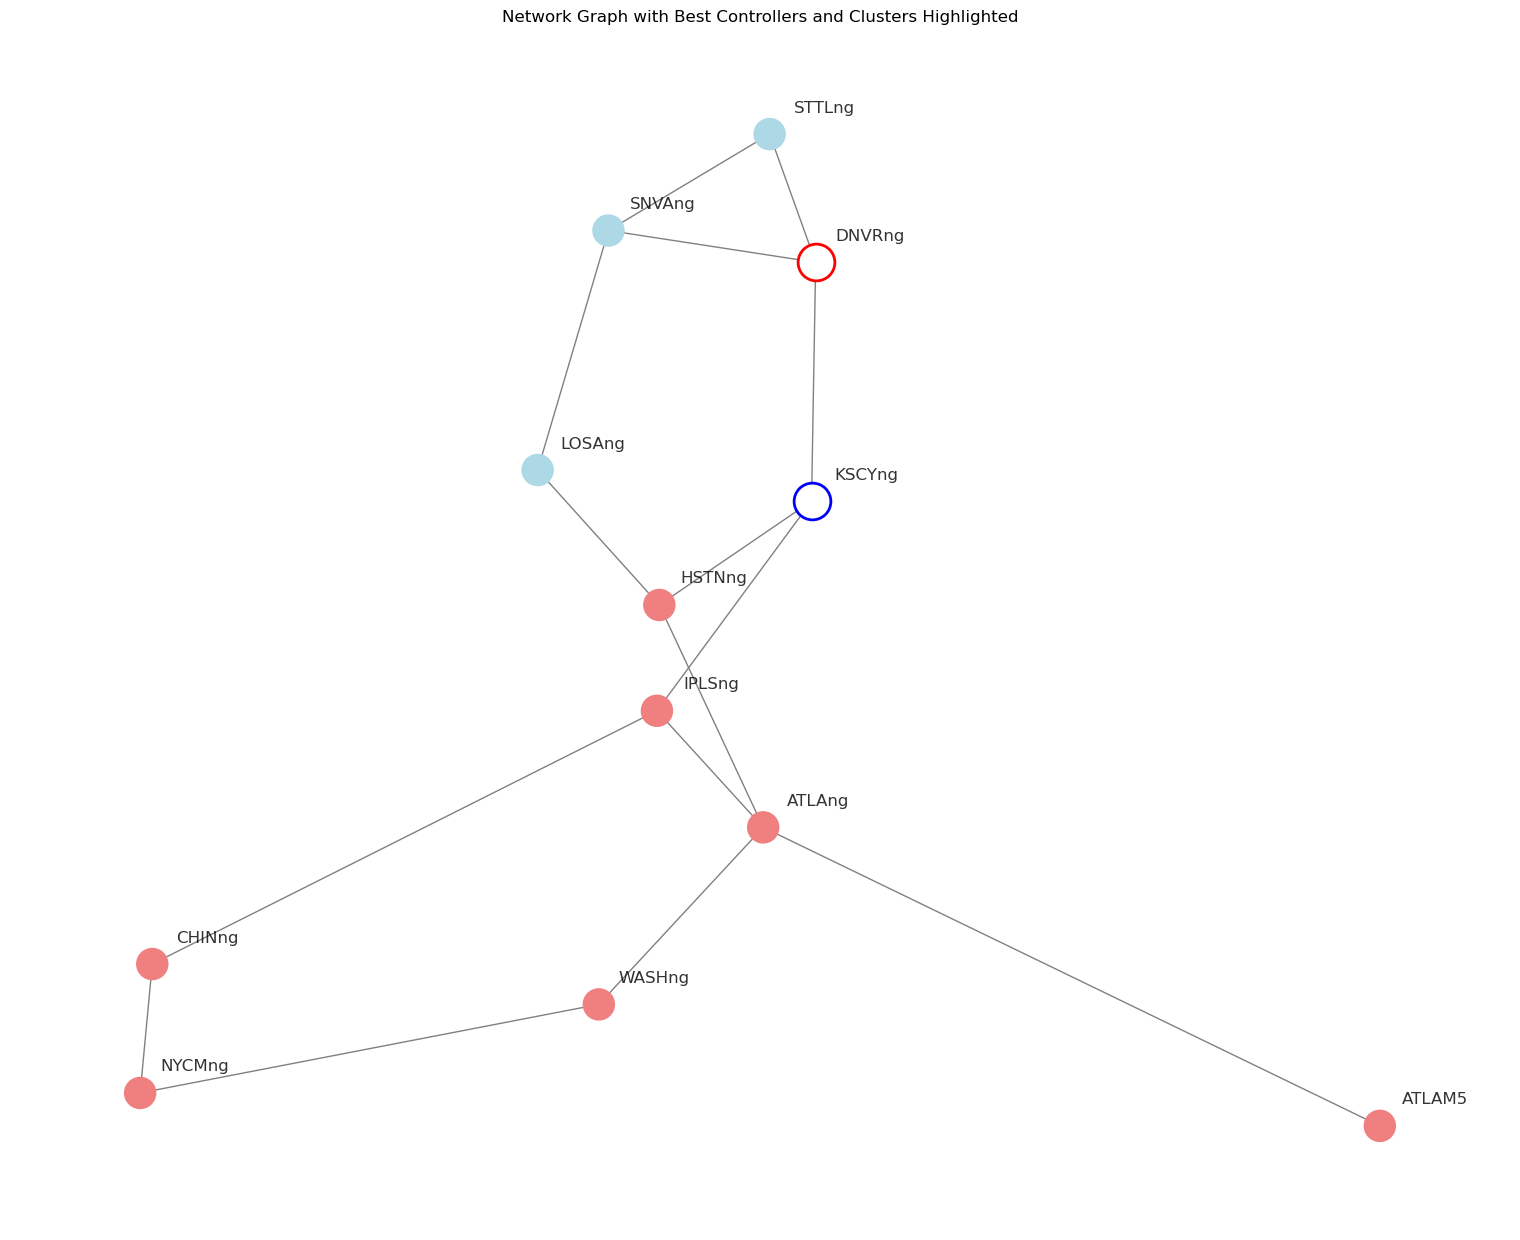

In [413]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(G, best_controllers, clusters, y_off=0.05, x_off=0.05):

    pos = nx.spring_layout(G) 
    
    node_names = list(G.nodes)
    controller_a_name = node_names[best_controllers[0]]
    controller_b_name = node_names[best_controllers[1]]
    
    node_colors = []
    for node in G.nodes():
        if node == controller_a_name:
            node_colors.append('red')  
        elif node == controller_b_name:
            node_colors.append('blue')  
        elif node_names.index(node) in clusters['Controller A']:
            node_colors.append('lightcoral')  
        elif node_names.index(node) in clusters['Controller B']:
            node_colors.append('lightblue')  
        else:
            node_colors.append('lightgrey')
    
    pos_higher = {k: (v[0] + x_off, v[1] + y_off) for k, v in pos.items()}
    
    plt.figure(figsize=(15, 12))
    nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='gray')
    nx.draw_networkx_labels(G, pos_higher, font_size=12, alpha=0.8)
    
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_a_name], node_color='white', edgecolors='red', node_size=700, linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=[controller_b_name], node_color='white', edgecolors='blue', node_size=700, linewidths=2)
    
    plt.title("Network Graph with Best Controllers and Clusters Highlighted")
    plt.show()

plot_network(G, best_controllers, clusters)


In [345]:
def plot_graph(G, best_controllers, clusters):
    pos = {node: (G.nodes[node]['Longitude'], G.nodes[node]['Latitude']) for node in G.nodes}
    color_map = ['red' if clusters[i] == 0 else 'blue' for i in range(len(G.nodes))]

    nx.draw(G, pos, node_color=color_map, with_labels=True)
    nx.draw_networkx_nodes(G, pos, nodelist=[list(G.nodes)[best_controllers[0]]], node_color='green')
    nx.draw_networkx_nodes(G, pos, nodelist=[list(G.nodes)[best_controllers[1]]], node_color='yellow')
    plt.show()


plot_graph(G, best_controllers, clusters)


KeyError: 0

In [ ]:
import random
import numpy as np

# Assuming latency_matrix, bandwidth, capacity are defined as in your previous context
# Also assuming the functions fitness_function, initialize_population, select_best are defined as in the previous conversation

def fitness_function(controllers, latency_matrix, bandwidth, capacity):
    delay = np.sum(latency_matrix[:, controllers], axis=1).mean()
    bandwidth_utilization = bandwidth * len(controllers)
    capacity_utilization = capacity * len(controllers)
    return (1/delay) + bandwidth_utilization + capacity_utilization

def initialize_population(pop_size, num_nodes, num_controllers):
    population = []
    for _ in range(pop_size):
        individual = random.sample(range(num_nodes), num_controllers)
        population.append(individual)
    return population

def select_best(population, latency_matrix, bandwidth, capacity):
    best_individual = None
    best_fitness = float('-inf')
    for individual in population:
        fitness = fitness_function(individual, latency_matrix, bandwidth, capacity)
        if fitness > best_fitness:
            best_fitness = fitness
            best_individual = individual
    return best_individual

def krill_herd_optimization(latency_matrix, bandwidth, capacity, pop_size=10, iterations=100):
    num_nodes = len(latency_matrix)
    num_controllers = 2  # Set to 2 controllers as per your example
    population = initialize_population(pop_size, num_nodes, num_controllers)
    best_individual = None
    best_fitness = float('-inf')
    
    for _ in range(iterations):
        for i in range(pop_size):
            if random.random() < 0.1:  
                new_individual = random.sample(range(num_nodes), num_controllers)
                if fitness_function(new_individual, latency_matrix, bandwidth, capacity) > fitness_function(population[i], latency_matrix, bandwidth, capacity):
                    population[i] = new_individual
        
        current_best_individual = select_best(population, latency_matrix, bandwidth, capacity)
        current_best_fitness = fitness_function(current_best_individual, latency_matrix, bandwidth, capacity)
        
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_individual = current_best_individual
    
    return best_individual



best_controllers = krill_herd_optimization(latency_matrix, bandwidth, capacity)

# Print switches under each best controller
node_names = list(range(len(latency_matrix)))  # Assuming node indices correspond to switch IDs

for controller_idx, controller in enumerate(best_controllers):
    switches_under_controller = [node_names[switch_idx] for switch_idx in controller]
    print(f"Switches under Controller {controller_idx + 1}: {switches_under_controller}")


TypeError: 'int' object is not iterable